In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#import required packages
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# Input the data from the csv
df = pd.read_csv('yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
#Analyzing data for any missing or NaN values
df.shape
df.isnull().values.any()

False

In [4]:
#since we need just the reviews and the rating, we drop the remaining columns
df = df.drop(columns=["business_id","date","review_id","type","user_id","cool","useful","funny"])
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [5]:
#Assign a 1 value for reviews that have a rating >3.5 and 0 otherwise
df['label'] = 0
df.loc[df["stars"]>3.5,"label"] = 1
df.loc[df['label']>0].head(10)

,stars,text,label
0,5,My wife took me here on my birthday for breakf...,1
1,5,I have no idea why some people give bad review...,1
2,4,love the gyro plate. Rice is so good and I als...,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,5,General Manager Scott Petello is a good egg!!!...,1
5,4,"Quiessence is, simply put, beautiful. Full wi...",1
6,5,Drop what you're doing and drive here. After I...,1
7,4,"Luckily, I didn't have to travel far to make m...",1
8,4,Definitely come for Happy hour! Prices are ama...,1
9,5,Nobuo shows his unique talents with everything...,1


In [6]:
df.groupby('stars').count()

,text,label
stars,,
1,749,749
2,927,927
3,1461,1461
4,3526,3526
5,3337,3337


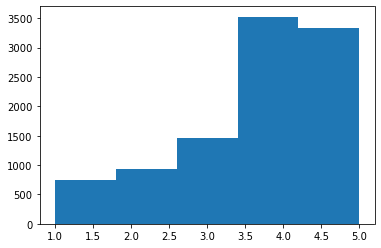

In [7]:
# plotting the points  and visualize the general trend

x = df['stars']
 
# naming the x axis 
plt.hist(x, bins = 5)
plt.show()


In [8]:
#Split the data into train and test sets

train_df, test_df = train_test_split(df, test_size=0.2, random_state=77)
train_df.head()

,stars,text,label
918,3,I was NOT too impressed with this place but......,0
6809,5,Our server Amanda was awesome with her suggest...,1
6234,4,Solid options for fast casual mexican fare. W...,1
217,5,Love Krista!,1
5019,5,This is the new mecca of Phoenix music. \n\nCh...,1


In [9]:
import pandas as pd

X_train, y_train = train_df["text"], train_df["label"]
X_test, y_test = test_df["text"], test_df["label"]
train_df.head()

,stars,text,label
918,3,I was NOT too impressed with this place but......,0
6809,5,Our server Amanda was awesome with her suggest...,1
6234,4,Solid options for fast casual mexican fare. W...,1
217,5,Love Krista!,1
5019,5,This is the new mecca of Phoenix music. \n\nCh...,1


In [10]:
#Create a baseline Dummy Classifier model
dummy = DummyClassifier(strategy="stratified")
dummy.fit(X_train, y_train)
dummy_scores_df = pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=5, return_train_score=True))
dummy_scores_df

,fit_time,score_time,test_score,train_score
0,0.000997,0.000000,0.560625,0.564531
1,0.000000,0.000997,0.562500,0.580469
2,0.001003,0.000000,0.570000,0.570312
3,0.000846,0.001002,0.575625,0.567344
4,0.000985,0.001100,0.566250,0.569375


In [11]:
#Calculating dummy scores mean
dummy_mean = dummy_scores_df.mean()
dummy_mean

fit_time       0.000766
score_time     0.000620
test_score     0.567000
train_score    0.570406
dtype: float64

In [12]:

#make a pipeline with required steps
pipe = make_pipeline(
       (CountVectorizer()),
       (LogisticRegression(random_state=12, max_iter=1000, class_weight="balanced"))
)

scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,1.759457,0.118330,0.815625,0.994531
1,1.725585,0.199931,0.815000,0.994531
2,2.590159,0.156451,0.825000,0.994531
3,1.801399,0.123147,0.835000,0.995938
4,1.794941,0.126094,0.823125,0.993281


In [13]:
from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "countvectorizer__max_features": randint(10, 10000),
    "logisticregression__C": loguniform(0.01, 100),
}

r_search = RandomizedSearchCV(pipe, param_grid ,cv=3, scoring = "f1",return_train_score=True,verbose=2, random_state= 289,n_jobs=-1, n_iter=10)
r_search.fit(X_train, y_train);

r_search.score(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


0.8632768361581921

In [14]:
pprint(r_search.best_estimator_.get_params())


{'countvectorizer': CountVectorizer(max_features=7267),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': <class 'numpy.int64'>,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': 7267,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'logisticregression': LogisticRegression(C=0.03576296261595698, class_weight='balanced',
                   max_iter=1000, random_state=12),
 'logisticregression__C': 0.03576296261595698,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__dual': F

In [15]:
train_score = r_search.score(X_train, y_train)
test_score = r_search.score(X_test, y_test)
print(train_score)

0.9292457238994298


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

r_search.fit(X_train, y_train);
predictions = r_search.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm


Fitting 3 folds for each of 10 candidates, totalling 30 fits


array([[ 491,  153],
       [ 210, 1146]], dtype=int64)

In [19]:
best_estimator = r_search.best_estimator_
#Try retrieving the key words from the reviews to see how they impact the label
coef_df = pd.DataFrame({
    'keywords': best_estimator[ "countvectorizer"].get_feature_names_out(),
    'coefficient': best_estimator["logisticregression"].coef_[0]
})

coef_df



,keywords,coefficient
0,00,-0.057024
1,000,-0.015010
2,00pm,0.053421
3,05,-0.031663
4,07,0.005914
...,...,...
7262,zipps,-0.064483
7263,zoe,-0.016068
7264,zone,-0.031770
7265,zoo,0.022406


In [20]:
print("Words most contained in positive reviews are :")
print(coef_df.sort_values(by=['coefficient'],ascending=False)[0:10]['keywords'])


Words most contained in positive reviews are :
1842     delicious
283        amazing
679           best
507        awesome
4704       perfect
2871         great
2305     excellent
3824          love
1831    definitely
5176     recommend
Name: keywords, dtype: object


In [21]:
print("Words most contained in negative reviews are :")
print(coef_df.sort_values(by=['coefficient'],ascending=True)[0:10]['keywords'])


Words most contained in negative reviews are :
4524    overpriced
4411            ok
4347       nothing
497        average
735          bland
524            bad
4412          okay
4005      mediocre
3151      horrible
5614          seem
Name: keywords, dtype: object


In [23]:
#Now obtain the predicted values based on our model

y_proba = r_search.predict_proba(X_test)

pred_dict = {'Review Text': X_test,
             'true_label' : y_test,
             'predicted_label' : predictions.tolist(),
             'neg_label_prob' : y_proba[:,0].tolist(),
             'pos_label_prob' : y_proba[:,1].tolist()
             
            }
results_df = pd.DataFrame(pred_dict)
results_df




,Review Text,true_label,predicted_label,neg_label_prob,pos_label_prob
7410,It's like being a Target girl but recognizing ...,0,0,0.594096,0.405904
261,This has been a long time coming and is one mo...,1,1,0.483741,0.516259
8425,I love to hike Piestewa (formerly known as Squ...,1,1,0.066851,0.933149
722,"Good water pressure. $2 = 6 min. Cons- ""water...",1,0,0.666686,0.333314
3106,"It's an airport, and what exactly does one loo...",1,0,0.873484,0.126516
...,...,...,...,...,...
4131,I feel like such a noob. We consider ourselves...,1,1,0.186439,0.813561
3761,went for an early dinner with my honey on satu...,1,1,0.010180,0.989820
3432,Chicken wings and cheeseburger meal... Yummmay...,1,1,0.119440,0.880560
2857,Just moved to AZ and this is my local Petco. E...,1,1,0.174912,0.825088


In [24]:
#Examining  predicted reviews

predict_y = r_search.predict(X_test)

lr_targets = pd.DataFrame({"y":y_test,
                           "pred y": predict_y.tolist(),
                           "prob_difference": (abs(y_proba[:,0] - y_proba[:,1])).tolist()})
lr_targets.sort_values(by="prob_difference").head()


,y,pred y,prob_difference
5310,1,0,0.000083
6138,1,1,0.000943
4065,0,0,0.001235
6811,1,1,0.001256
3866,1,0,0.001519


In [25]:
#Examining reviews whose labels were not accurately predicted by the model
results_df.loc[~(results_df['true_label'] == results_df['predicted_label'])]

,Review Text,true_label,predicted_label,neg_label_prob,pos_label_prob
722,"Good water pressure. $2 = 6 min. Cons- ""water...",1,0,0.666686,0.333314
3106,"It's an airport, and what exactly does one loo...",1,0,0.873484,0.126516
1351,I live in a town where I can find 5 Filipino r...,1,0,0.998500,0.001500
8838,Been a patron since this eatery first opened. ...,1,0,0.517474,0.482526
2461,Okay.....so....I have this thing about going o...,0,1,0.456212,0.543788
...,...,...,...,...,...
3803,This Chili's isn't a lot different than the on...,1,0,0.614257,0.385743
5482,The Fries Need Work! I have been here several ...,1,0,0.754620,0.245380
117,"Absolutely the best sushi in the valley, hands...",0,1,0.473387,0.526613
4497,Hob Nob's Coffee House and Gourmet Deli is wha...,0,1,0.046612,0.953388
